In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [2]:
sns.set(context='notebook',style='ticks')

## 1

A

In [3]:
N = 1000
p = 0.2
total_sims = []
for i in xrange(N):
    randnums = np.random.uniform(size=N)
    m = np.zeros(N)
    for i,x in enumerate(randnums):
        if x < p:
            m[i] = 1
    sum_m = m.sum()
    total_sims.append(sum_m)

In [9]:
np.array(total_sims).min()

165.0

In [6]:
bins

array([ 165.,  166.,  167.,  168.,  169.,  170.,  171.,  172.,  173.,
        174.,  175.,  176.,  177.,  178.,  179.,  180.,  181.,  182.,
        183.,  184.,  185.,  186.,  187.,  188.,  189.,  190.,  191.,
        192.,  193.,  194.,  195.,  196.,  197.,  198.,  199.,  200.,
        201.,  202.,  203.,  204.,  205.,  206.,  207.,  208.,  209.,
        210.,  211.,  212.,  213.,  214.,  215.,  216.,  217.,  218.,
        219.,  220.,  221.,  222.,  223.,  224.,  225.,  226.,  227.,
        228.,  229.,  230.,  231.,  232.,  233.,  234.,  235.,  236.,
        237.,  238.,  239.,  240.,  241.,  242.])

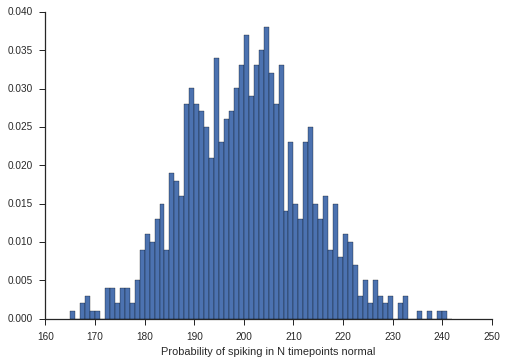

In [5]:
bins = np.arange(np.floor(np.array(total_sims).min()),np.ceil(np.array(total_sims).max()))
values,base = np.histogram(total_sims,bins=bins,density=1)
plt.bar(base[:-1],values,width=1)
plt.xlabel('Probability of spiking in N timepoints normal')
sns.despine()

Looks like a normal distribution centered around the expectated of the number of spikes.

B

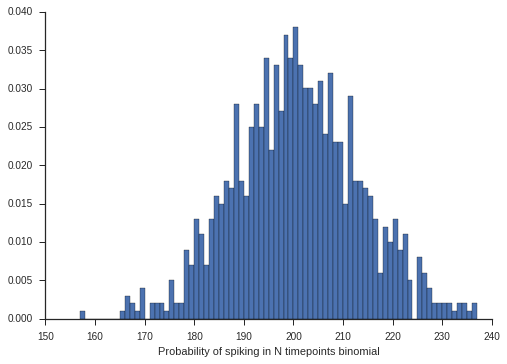

In [50]:
N = 1000
p = 0.2
randnums_binomial = np.random.binomial(N,p,N)
bins = np.arange(np.floor(randnums_binomial.min()),np.ceil(randnums_binomial.max()))
values,base = np.histogram(randnums_binomial,bins=bins,density=1)
plt.bar(base[:-1],values,width=1)
plt.xlabel('Probability of spiking in N timepoints binomial')
sns.despine()

Looks like a normal distribution that is centered around the expectation (200 spikes in 1000 samples)

C

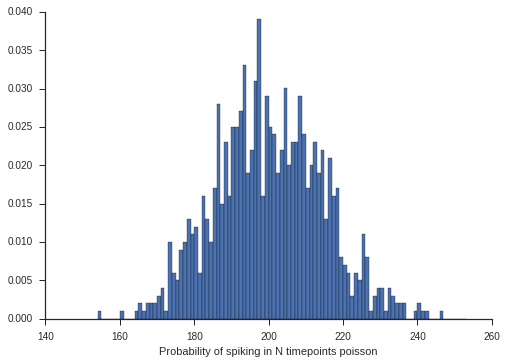

In [51]:
N = 1000
p = 200
randnums = np.random.poisson(p,N)
bins = np.arange(np.floor(randnums.min()),np.ceil(randnums.max()))
values,base = np.histogram(randnums,bins=bins,density=1)
plt.bar(base[:-1],values,width=1)
plt.xlabel('Probability of spiking in N timepoints poisson')
sns.despine()

Binomial and Poisson look very similar to one another, which also looks very similar to the normal distribution centered around the expectation of 200 spikes and nothing like a uniform distribution.

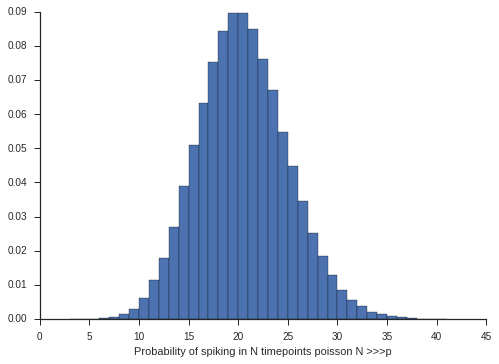

In [137]:
N = 100000
p = 20
randnums = np.random.poisson(p,N)
bins = np.arange(np.floor(randnums.min()),np.ceil(randnums.max()))
values,base = np.histogram(randnums,bins=bins,density=1)
plt.bar(base[:-1],values,width=1)
plt.xlabel('Probability of spiking in N timepoints poisson N >>>p')
sns.despine()

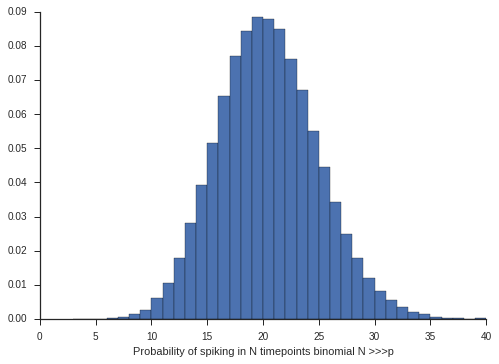

In [138]:
N = 100000
p = 20/N
randnums_binomial = np.random.binomial(N,p,N)
bins = np.arange(np.floor(randnums_binomial.min()),np.ceil(randnums_binomial.max()))
values,base = np.histogram(randnums_binomial,bins=bins,density=1)
plt.bar(base[:-1],values,width=1)
plt.xlabel('Probability of spiking in N timepoints binomial N >>>p')
sns.despine()

At N >>> p it looks identical and like a normal distribution.

## 2

In [55]:
import scipy.io as sio
spike_mat_data = sio.loadmat('spike_data.mat')['data']

In [72]:
spike_mat_dataframe = pd.DataFrame(spike_mat_data,columns=['A','B','C'])

In [113]:
c_given_a_b = (spike_mat_dataframe.sum(axis=1) == 3).sum()
c_given_a = spike_mat_dataframe.loc[(spike_mat_dataframe.A==1) & (spike_mat_dataframe.C==1)].shape[0] - c_given_a_b
c_given_b = spike_mat_dataframe.loc[(spike_mat_dataframe.B==1) & (spike_mat_dataframe.C==1)].shape[0] - c_given_a_b
c_only = spike_mat_dataframe.loc[(spike_mat_dataframe.C==1 )& (spike_mat_dataframe.sum(axis=1)==1)].shape[0]
b_only = spike_mat_dataframe.loc[(spike_mat_dataframe.B==1) & (spike_mat_dataframe.sum(axis=1)==1)].shape[0]
a_only = spike_mat_dataframe.loc[(spike_mat_dataframe.A==1) & (spike_mat_dataframe.sum(axis=1)==1)].shape[0]
a_given_b = spike_mat_dataframe.loc[(spike_mat_dataframe.A==1) & (spike_mat_dataframe.sum(axis=1)==2) & (spike_mat_dataframe.B==1)].shape[0]
all_zeros = (spike_mat_dataframe.sum(axis=1) == 0).sum()
total_events = spike_mat_dataframe.shape[0]

In [114]:
observation_dict = {'C=1|A=1,B=1':c_given_a_b,'C=1|A=1':c_given_a,'C=1|B=1':c_given_b,
                   'C=1':c_only,'B=1':b_only,'A=1':a_only,'A=0,B=0,C=0':all_zeros,'A=1|B=1':a_given_b}

In [115]:
sum(observation_dict.values())

10000

In [116]:
probabilities_dict = {}
for k in observation_dict:
    new_key = 'P({})'.format(k)
    probabilities_dict[new_key] = observation_dict[k]/total_events

In [120]:
probabilities_dict

{'P(A=0,B=0,C=0)': 0.70609999999999995,
 'P(A=1)': 0.0478,
 'P(A=1|B=1)': 0.03,
 'P(B=1)': 0.0101,
 'P(C=1)': 0.0381,
 'P(C=1|A=1)': 0.0028999999999999998,
 'P(C=1|A=1,B=1)': 0.12429999999999999,
 'P(C=1|B=1)': 0.0407}

In [110]:
probabilities_dict['P(C=1|A=1,B=1)']

0.12429999999999999

In [111]:
probabilities_dict['P(C=1|B=1)']*probabilities_dict['P(C=1|A=1)']

0.00011802999999999999

The network is more likely to be A->B->C because the probability of A->C and A->B should be equivalent if this were the configuration. However, we see that C=1|A=1 is much less likely than B=1|A=1, and P(C=1|A=1,B=1) != P(C=1|B=1)*P(C=1|A=1), indicating these events are not conditionally independent